In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


第一步

In [ ]:
!git clone https://github.com/jasonfghx/Medical-voice-recognition_processing_system.git

Cloning into 'Medical-voice-recognition_processing_system'...
remote: Enumerating objects: 2082, done.
remote: Counting objects: 100% (2082/2082), done.
remote: Compressing objects: 100% (2073/2073), done.
remote: Total 2082 (delta 295), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (2082/2082), 729.44 MiB | 9.77 MiB/s, done.
Resolving deltas: 100% (295/295), done.
Updating files: 100% (1915/1915), done.


第二步

In [ ]:
!pip install librosa

第三步

In [ ]:
import scipy
from keras.models import load_model
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import IPython.display as ipd  # to play sound in notebook
import glob
import pandas as pd
import numpy as np
from keras import Sequential
from keras.utils import Sequence, to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import Dense, Dropout, Input, Convolution2D, BatchNormalization, Activation, MaxPool2D, Flatten,Conv1D,Bidirectional,LSTM,Reshape
from sklearn.metrics import confusion_matrix
import librosa
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

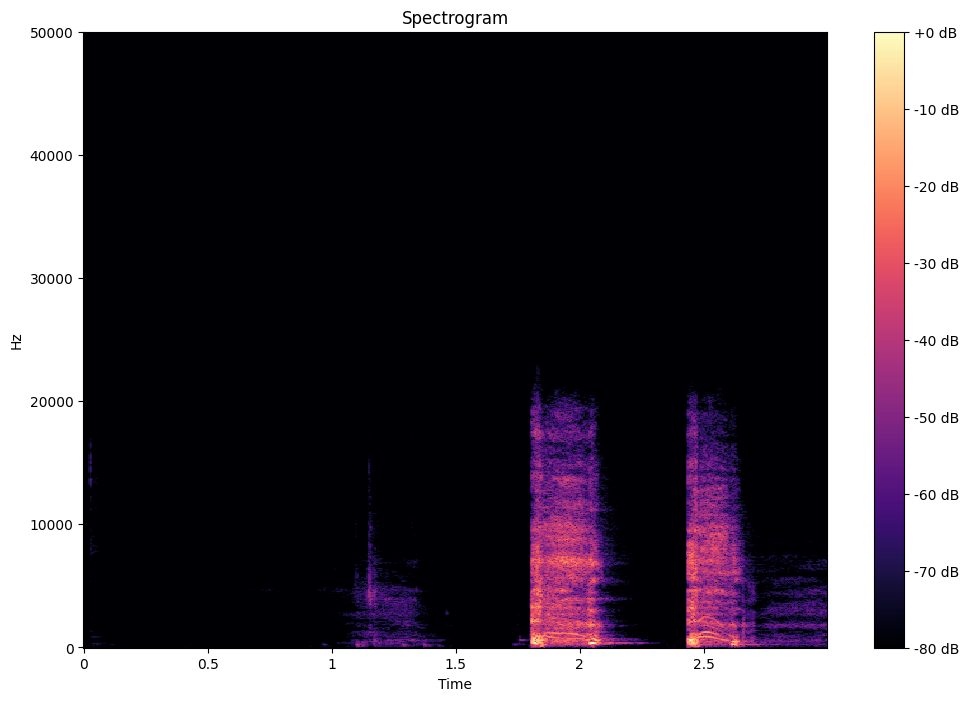

In [ ]:
input_duration = 3
wave1_c, sr = librosa.load(r"/content/Medical-voice-recognition_processing_system/cough/Negative/1000_Negative_female_28_cough.wav", sr=100000,duration=input_duration)
S = np.abs(librosa.stft(wave1_c))

S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

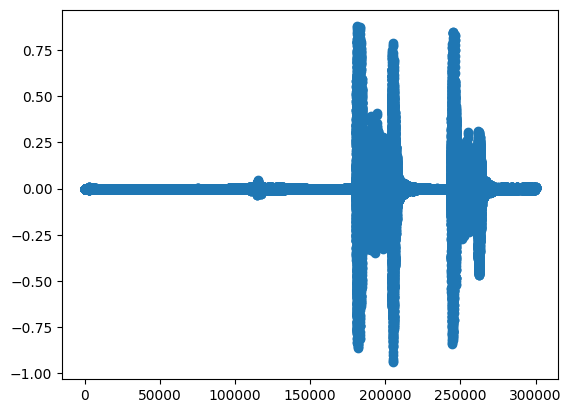

In [ ]:
# 把聲音振幅畫成圖
plt.scatter(list(range(0,len(wave1_c))),wave1_c)

In [ ]:
# NMF
import librosa
import numpy as np
from sklearn.decomposition import NMF
# n_components 指的是要提取的特徵数量
def extract_nmf_spectrogram_features(audio_path, n_components=50, n_fft=2048, hop_length=512):
    # Load the audio file
    input_duration = 3
    y, sr = librosa.load(audio_path, sr=100000,duration=input_duration)

    # Compute the spectrogram
    spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Apply NMF
    nmf = NMF(n_components=n_components, random_state=0)
    W = nmf.fit_transform(spectrogram.T)
    H = nmf.components_

    # W contains the activation patterns, H contains the spectral bases
    return W, H

# Example usage
audio_file = '/content/Medical-voice-recognition_processing_system/cough/Negative/1000_Negative_female_28_cough.wav'
W, H = extract_nmf_spectrogram_features(audio_file)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
# # + 1  - 0 cough

audio_file = '/content/Medical-voice-recognition_processing_system/cough/Negative/1000_Negative_female_28_cough.wav'
W, H = extract_nmf_spectrogram_features(audio_file)
mfccs_NMF=H.reshape(1,H.shape[0]*H.shape[1])
label=[0]
add1=[]
add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Negative/*.wav")

for j in tqdm(add[:50]):
  W, H = extract_nmf_spectrogram_features(j)
  mfccs=H.reshape(1,H.shape[0]*H.shape[1])
  mfccs_NMF=np.vstack([mfccs_NMF,mfccs])
  label.append(0)
add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Positive/*.wav")
add=add*5
for j in tqdm(add[:50]):
  W, H = extract_nmf_spectrogram_features(j)
  mfccs=H.reshape(1,H.shape[0]*H.shape[1])
  # print(mfccs.shape)
  mfccs_NMF=np.vstack([mfccs_NMF,mfccs])
  label.append(1)

X_train, X_test, y_train, y_test = train_test_split(mfccs_NMF, label, test_size=0.2, random_state=48)

# Create an SVM classifier
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

100%|██████████| 50/50 [02:05<00:00,  2.52s/it]


Confusion Matrix:
[[6 2]
 [9 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.75      0.52         8
           1       0.67      0.31      0.42        13

    accuracy                           0.48        21
   macro avg       0.53      0.53      0.47        21
weighted avg       0.57      0.48      0.46        21



In [ ]:
len(glob.glob("/content/Medical-voice-recognition_processing_system/cough/Positive/*.wav"))

80

In [ ]:
# undersampling
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
# # + 1  - 0 cough

audio_file = '/content/Medical-voice-recognition_processing_system/cough/Negative/1000_Negative_female_28_cough.wav'
W, H = extract_nmf_spectrogram_features(audio_file)
mfccs_NMF=H.reshape(1,H.shape[0]*H.shape[1])
label=[0]
add1=[]
add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Negative/*.wav")

for j in tqdm(add[:80]):
  W, H = extract_nmf_spectrogram_features(j)
  mfccs=H.reshape(1,H.shape[0]*H.shape[1])
  mfccs_NMF=np.vstack([mfccs_NMF,mfccs])
  label.append(0)
add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Positive/*.wav")
add=add
for j in tqdm(add):
  W, H = extract_nmf_spectrogram_features(j)
  mfccs=H.reshape(1,H.shape[0]*H.shape[1])
  # print(mfccs.shape)
  mfccs_NMF=np.vstack([mfccs_NMF,mfccs])
  label.append(1)

X_train, X_test, y_train, y_test = train_test_split(mfccs_NMF, label, test_size=0.2, random_state=48)

# Create an SVM classifier
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

100%|██████████| 80/80 [03:30<00:00,  2.63s/it]


Confusion Matrix:
[[11  3]
 [12  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.79      0.59        14
           1       0.70      0.37      0.48        19

    accuracy                           0.55        33
   macro avg       0.59      0.58      0.54        33
weighted avg       0.61      0.55      0.53        33



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
# # + 1  - 0 cough
# oversampling
audio_file = '/content/Medical-voice-recognition_processing_system/cough/Negative/1000_Negative_female_28_cough.wav'
W, H = extract_nmf_spectrogram_features(audio_file)
mfccs_NMF=H.reshape(1,H.shape[0]*H.shape[1])
label=[0]
add1=[]
add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Negative/*.wav")

for j in tqdm(add[:400]):
  W, H = extract_nmf_spectrogram_features(j)
  mfccs=H.reshape(1,H.shape[0]*H.shape[1])
  mfccs_NMF=np.vstack([mfccs_NMF,mfccs])
  label.append(0)
add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Positive/*.wav")
add=add
for j in tqdm(add[:400]):
  W, H = extract_nmf_spectrogram_features(j)
  mfccs=H.reshape(1,H.shape[0]*H.shape[1])
  # print(mfccs.shape)
  mfccs_NMF=np.vstack([mfccs_NMF,mfccs])
  label.append(1)

X_train, X_test, y_train, y_test = train_test_split(mfccs_NMF, label, test_size=0.2, random_state=48)

# Create an SVM classifier
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

100%|██████████| 50/50 [02:05<00:00,  2.51s/it]


Confusion Matrix:
[[21  0]
 [ 9  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        21
           1       1.00      0.10      0.18        10

    accuracy                           0.71        31
   macro avg       0.85      0.55      0.50        31
weighted avg       0.80      0.71      0.62        31



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# 应用 SMOTE
X_resampled, y_resampled = smote.fit_resample(mfccs_NMF, label)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=48)

# Create an SVM classifier
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18  1]
 [ 4 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.95      0.82      0.88        22

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.89      0.88      0.88        41



In [ ]:
mfccs1.shape

(20, 196)

In [ ]:
# + 1  - 0 cough
input_duration = 2
wave1, sr = librosa.load(r"/content/Medical-voice-recognition_processing_system/cough/Negative/1000_Negative_female_28_cough.wav", sr=10000*2,duration=input_duration)
wave1=np.pad(wave1, (0, 100000-wave1.shape[0]), 'constant')
mfccs1 = librosa.feature.mfcc(y=wave1, sr=sr)
mfccs1_c=np.expand_dims(mfccs1,axis=0)
label_c=[0]
add1=[]

add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Negative/*.wav")

print(len(add))
for j in add:
  wave, sr = librosa.load(j, sr=10000*2,duration=input_duration)
  wave=wave
  wave=np.pad(wave, (0, 100000-wave.shape[0]), 'constant')
  mfccs = librosa.feature.mfcc(y=wave, sr=sr)
  mfccs=np.expand_dims(mfccs,axis=0)
  mfccs1_c=np.vstack([mfccs1_c,mfccs])
  label_c.append(0)
add=glob.glob("/content/Medical-voice-recognition_processing_system/cough/Positive/*.wav")

add=add*10
print(len(add))
for j in add:
  wave, sr = librosa.load(j, sr=10000*2,duration=input_duration)
  wave=wave
  wave=np.pad(wave, (0, 100000-wave.shape[0]), 'constant')
  mfccs = librosa.feature.mfcc(y=wave, sr=sr)
  mfccs=np.expand_dims(mfccs,axis=0)
  mfccs1_c=np.vstack([mfccs1_c,mfccs])
  label_c.append(1)


wave1_c=mfccs1_c.copy()
label1_c=to_categorical(label_c)



877
800


In [ ]:
# MFCC+SVM
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(wave1_c.reshape(wave1_c.shape[0],20*196), label_c, test_size=0.3, random_state=42)

# Create an SVM classifier
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[223  32]
 [  0 249]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       255
           1       0.89      1.00      0.94       249

    accuracy                           0.94       504
   macro avg       0.94      0.94      0.94       504
weighted avg       0.94      0.94      0.94       504

